In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [2]:
movie  = pd.read_csv("C:/Users/Dell/Downloads/movie.csv")

In [3]:
movie.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
movie.shape

(40000, 2)

In [5]:
movie.tail()

,text,label
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1
39999,"Why would this film be so good, but only gross...",1


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


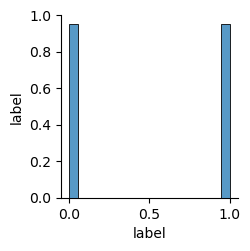

In [6]:
sns.pairplot(movie)

In [7]:
#doing eda 

In [8]:
movie.nunique()

text     39723
label        2
dtype: int64

In [9]:
print(movie.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool


In [10]:
movie.drop_duplicates(inplace = True)

In [11]:
movie.shape

(39723, 2)

In [12]:
label_count = movie['label'].value_counts()

In [13]:
print(label_count)

label
1    19908
0    19815
Name: count, dtype: int64


In [14]:
movie['rev_len'] = movie['text'].apply(len)
print(movie['rev_len'])

0         874
1        1811
2         983
3         351
4         983
         ... 
39995    3111
39996     291
39997    1092
39998    1045
39999     727
Name: rev_len, Length: 39723, dtype: int64


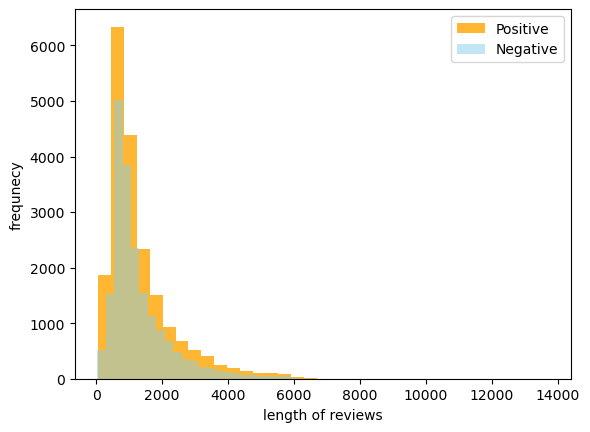

In [15]:
#plotting the graph
positive_reviews = movie[movie['label'] == 1]['rev_len']
negative_reviews = movie[movie['label'] == 0]['rev_len']
plt.hist(positive_reviews, bins=35, alpha=0.8, color='orange', label='Positive')
plt.hist(negative_reviews, bins=35, alpha=0.5, color='skyblue', label='Negative')
plt.xlabel("length of reviews")
plt.ylabel("frequnecy")
plt.legend(loc = 'upper right')

In [16]:
#Data preprocesing

In [17]:
#lowercasing the text
movie['text'] = movie['text'].str.lower()

In [18]:
#removing html tags and url

def removal_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)
def removal_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [19]:
movie['text']=movie['text'].apply(removal_html_tags)
movie['text']=movie['text'].apply(removal_url)

In [20]:
movie.head()

,text,label,rev_len
0,i grew up (b. 1965) watching and loving the th...,0,874
1,"when i put this movie in my dvd player, and sa...",0,1811
2,why do people who do not know what a particula...,0,983
3,even though i have great interest in biblical ...,0,351
4,im a die hard dads army fan and nothing will e...,1,983


In [21]:
#removing punctuation
def removal_punc(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [22]:
movie['text']=movie['text'].apply(removal_punc)

In [23]:
movie['text'][200]

'i love his martial arts style it is quick close up and oh so fast but it seems like his movies are becoming more and more crime based lifestyle quality and less meaningi thought he was out to bring forth a deeper message at least some of the movies had a hidden meaning or agenda this one had some good redeeming qualities of the character but the rest was so far off i was very disappointed the martial arts is also suffering i am hoping to see a more devoted segal in his future films this movie also lacks in keeping the story line going there are too many gaps so the thought is lost too many things are cryptic without a solution'

In [24]:
#removing emojis

In [25]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [26]:
movie['text'] = movie['text'].apply(remove_emojis)
movie.head()

,text,label,rev_len
0,i grew up b 1965 watching and loving the thund...,0,874
1,when i put this movie in my dvd player and sat...,0,1811
2,why do people who do not know what a particula...,0,983
3,even though i have great interest in biblical ...,0,351
4,im a die hard dads army fan and nothing will e...,1,983


In [27]:
#removing stopwords

In [28]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords

In [30]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
from nltk.tokenize import word_tokenize
# Function to remove stopwords from a given text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    new_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(new_text)


In [32]:
movie['text'] = movie['text'].apply(remove_stopwords)

In [33]:
movie.head()

,text,label,rev_len
0,grew b 1965 watching loving thunderbirds mates...,0,874
1,put movie dvd player sat coke chips expectatio...,0,1811
2,people know particular time past like feel nee...,0,983
3,even though great interest biblical movies bor...,0,351
4,im die hard dads army fan nothing ever change ...,1,983


In [34]:
movie['text'][200]
movie.head()

,text,label,rev_len
0,grew b 1965 watching loving thunderbirds mates...,0,874
1,put movie dvd player sat coke chips expectatio...,0,1811
2,people know particular time past like feel nee...,0,983
3,even though great interest biblical movies bor...,0,351
4,im die hard dads army fan nothing ever change ...,1,983


In [35]:
#Doing Stemming 

In [36]:
from nltk.stem.porter import PorterStemmer

In [37]:
def stemming(text):
    ps = PorterStemmer()
    word_tokens = word_tokenize(text)
    new_text= [ps.stem(word) for word in word_tokens]
    return ' '.join(new_text)

In [38]:
movie['text'] = movie['text'].apply(stemming)

In [39]:
#Doing Lemmetization

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)




In [42]:
movie['text'] = movie['text'].apply(lemmatize_text)

In [43]:
movie.head()

,text,label,rev_len
0,grew b 1965 watch love thunderbird mate school...,0,874
1,put movi dvd player sat coke chip expect hope ...,0,1811
2,peopl know particular time past like feel need...,0,983
3,even though great interest biblic movi bore de...,0,351
4,im die hard dad armi fan noth ever chang got t...,1,983


In [44]:
"""from nltk.tokenize import sent_tokenize,word_tokenize
movie['text'] = movie['text'].apply(lambda x: word_tokenize(x))"""

"from nltk.tokenize import sent_tokenize,word_tokenize\nmovie['text'] = movie['text'].apply(lambda x: word_tokenize(x))"

In [45]:
movie.head()

,text,label,rev_len
0,grew b 1965 watch love thunderbird mate school...,0,874
1,put movi dvd player sat coke chip expect hope ...,0,1811
2,peopl know particular time past like feel need...,0,983
3,even though great interest biblic movi bore de...,0,351
4,im die hard dad armi fan noth ever chang got t...,1,983


In [46]:
#Feature Extraction

In [47]:
#implementing bag of words
from sklearn.feature_extraction.text import CountVectorizer
"""cv = CountVectorizer(ngram_range=(1,3))"""

'cv = CountVectorizer(ngram_range=(1,3))'

In [48]:
"""bow = cv.fit_transform(movie['text'])"""
"""using movie['text'] = cv.fit_transform(movie['text']) gives error as the dataset is too big hence n-gram bag of words is not a good method
along with that one hot encoding is just a more worse version of this"""
"""OHE can't handle semantic meanings at all whereas bag of words can give semantic relation but can give wrong semantic relation frequently"""
"""print(len(cv.vocabulary_))"""

'print(len(cv.vocabulary_))'

In [49]:
movie.head()

,text,label,rev_len
0,grew b 1965 watch love thunderbird mate school...,0,874
1,put movi dvd player sat coke chip expect hope ...,0,1811
2,peopl know particular time past like feel need...,0,983
3,even though great interest biblic movi bore de...,0,351
4,im die hard dad armi fan noth ever chang got t...,1,983


In [50]:
min(movie['rev_len'])

32

In [51]:
#bag of words and count vectorizer
cv=CountVectorizer()
cv_reviews=cv.fit_transform(movie['text'])
print('BOW_cv_train:',cv_reviews.shape)

BOW_cv_train: (39723, 155666)


In [52]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tv_reviews=tfidf.fit_transform(movie['text'])

print('Tfidf_train:',tv_reviews.shape)


Tfidf_train: (39723, 155666)


In [53]:
print(tfidf.idf_)

[ 9.02476146 10.49109853 10.89656364 ... 10.89656364 10.89656364
 10.89656364]


In [54]:
print(tv_reviews)

  (0, 73595)	0.11744385073179071
  (0, 45321)	0.1069029945570851
  (0, 66677)	0.07418474528001542
  (0, 131611)	0.1894940200273174
  (0, 117663)	0.34077774441328423
  (0, 65473)	0.1512837243859668
  (0, 84114)	0.16333773059241175
  (0, 113404)	0.09418431171417123
  (0, 4157)	0.08034158934867425
  (0, 85125)	0.056526134031695305
  (0, 113063)	0.08532267528434562
  (0, 24846)	0.09675668049241738
  (0, 116331)	0.0983387029111154
  (0, 145535)	0.09522953427885461
  (0, 50236)	0.026673219216270437
  (0, 148630)	0.06257808280882383
  (0, 65708)	0.11328945953484654
  (0, 29693)	0.05707490120249495
  (0, 146349)	0.06688305210880192
  (0, 24925)	0.10616600906393445
  (0, 38047)	0.05158571207381148
  (0, 61105)	0.06474371986290776
  (0, 53413)	0.16150548436062628
  (0, 73317)	0.1894940200273174
  (0, 32414)	0.06779609545961317
  :	:
  (39722, 141980)	0.07774460506210755
  (39722, 16413)	0.06667163067225036
  (39722, 22633)	0.09560234167492081
  (39722, 73145)	0.09573917672444071
  (39722, 118063

In [55]:
df = pd.DataFrame(tv_reviews[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)

In [56]:
print(df)

               TF-IDF
thunderbird  0.436713
sapien       0.340778
school       0.208230
subsp        0.189494
jonatha      0.189494
...               ...
fleshtheir   0.000000
fleshwith    0.000000
fletch       0.000000
fletcher     0.000000
כרמון        0.000000

[155666 rows x 1 columns]


In [57]:
movie.head()

,text,label,rev_len
0,grew b 1965 watch love thunderbird mate school...,0,874
1,put movi dvd player sat coke chip expect hope ...,0,1811
2,peopl know particular time past like feel need...,0,983
3,even though great interest biblic movi bore de...,0,351
4,im die hard dad armi fan noth ever chang got t...,1,983


In [58]:
#train-test-split


In [59]:
train_sentiments=movie['label'][:30000]
test_sentiments=movie['label'][30000:]
print(test_sentiments.shape)

(9723,)


In [60]:
cv_train_reviews = cv_reviews[:30000]
cv_test_reviews = cv_reviews[30000:]
print(cv_train_reviews.shape)

(30000, 155666)


In [61]:
tf_train_reviews = tv_reviews[:30000]
tf_test_reviews = tv_reviews[30000:]
print(tf_train_reviews.shape)

(30000, 155666)


In [62]:
#Modelling
#Logistic Regression Model

In [63]:
from sklearn.linear_model import LogisticRegression 

In [64]:
model = LogisticRegression(max_iter = 1000)

In [65]:
log_reg_cv = model.fit(cv_train_reviews,train_sentiments)
log_reg_tf = model.fit(tf_train_reviews,train_sentiments)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
logreg_bow_predict=model.predict(cv_test_reviews)
print(logreg_bow_predict)
logreg_tfidf_predict=model.predict(tf_test_reviews)
print(logreg_tfidf_predict)

[0 1 1 ... 0 1 1]
[0 1 1 ... 0 1 1]


In [68]:
logreg_bow_score=accuracy_score(test_sentiments,logreg_bow_predict)
print("lr_bow_score :",logreg_bow_score)

logreg_tfidf_score=accuracy_score(test_sentiments,logreg_tfidf_predict)
print("lr_tfidf_score :",logreg_tfidf_score)

lr_bow_score : 0.8702046693407385
lr_tfidf_score : 0.888614625115705


In [69]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [70]:
lr_bow_report=classification_report(test_sentiments,logreg_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

lr_tfidf_report=classification_report(test_sentiments,logreg_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.90      0.83      0.86      4803
    Negative       0.85      0.91      0.88      4920

    accuracy                           0.87      9723
   macro avg       0.87      0.87      0.87      9723
weighted avg       0.87      0.87      0.87      9723

              precision    recall  f1-score   support

    Positive       0.89      0.88      0.89      4803
    Negative       0.88      0.90      0.89      4920

    accuracy                           0.89      9723
   macro avg       0.89      0.89      0.89      9723
weighted avg       0.89      0.89      0.89      9723



In [71]:
cm_logreg_bow=confusion_matrix(test_sentiments,logreg_bow_predict,labels=[1,0])
print(cm_logreg_bow)
cm_logreg_tfidf=confusion_matrix(test_sentiments,logreg_tfidf_predict,labels=[1,0])
print(cm_logreg_tfidf)

[[4473  447]
 [ 815 3988]]
[[4412  508]
 [ 575 4228]]


In [72]:
cv_prediction = model.predict_proba(cv_test_reviews)[:, 1]
cv_auc_roc_score = roc_auc_score(test_sentiments,cv_prediction)
print(cv_auc_roc_score)
tf_prediction = model.predict_proba(tf_test_reviews)[:, 1]
tf_auc_roc_score = roc_auc_score(test_sentiments,tf_prediction)
print(tf_auc_roc_score)

0.9386153047976452
0.9567995697133734


In [73]:
#SVM model

In [74]:
from sklearn.linear_model import SGDClassifier

In [75]:
svm=SGDClassifier(max_iter=1000,random_state=48)

svm_bow=svm.fit(cv_train_reviews,train_sentiments)


svm_tfidf=svm.fit(tf_train_reviews,train_sentiments)


In [76]:
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)

svm_tfidf_predict=svm.predict(tf_test_reviews)
print(svm_tfidf_predict)

[0 1 1 ... 0 1 1]
[0 1 1 ... 0 1 1]


In [77]:
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.8756556618327677
svm_tfidf_score : 0.888511776200761


In [78]:

cm_svm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_svm_bow)

cm_svm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_svm_tfidf)

[[4438  482]
 [ 727 4076]]
[[4422  498]
 [ 586 4217]]


In [79]:
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.89      0.85      0.87      4803
    Negative       0.86      0.90      0.88      4920

    accuracy                           0.88      9723
   macro avg       0.88      0.88      0.88      9723
weighted avg       0.88      0.88      0.88      9723

              precision    recall  f1-score   support

    Positive       0.89      0.88      0.89      4803
    Negative       0.88      0.90      0.89      4920

    accuracy                           0.89      9723
   macro avg       0.89      0.89      0.89      9723
weighted avg       0.89      0.89      0.89      9723



In [80]:
"""cv_svm_prediction = svm.predict_proba(cv_svm_test_reviews)[:, 1]
cv_svm_auc_roc_score = roc_auc_score(test_sentiments, cv_svm_prediction)
print("CV AUC-ROC Score:", cv_svm_auc_roc_score)

tf_svm_prediction = svm.predict_proba(tf_svm_test_reviews)[:, 1]
tf_svm_auc_roc_score = roc_auc_score(test_sentiments, tf_svm_prediction)
print("TF AUC-ROC Score:", tf_svm_auc_roc_score)"""
#it throws an error as it needs a probability score but as loss = hinge probability score is not possible

'cv_svm_prediction = svm.predict_proba(cv_svm_test_reviews)[:, 1]\ncv_svm_auc_roc_score = roc_auc_score(test_sentiments, cv_svm_prediction)\nprint("CV AUC-ROC Score:", cv_svm_auc_roc_score)\n\ntf_svm_prediction = svm.predict_proba(tf_svm_test_reviews)[:, 1]\ntf_svm_auc_roc_score = roc_auc_score(test_sentiments, tf_svm_prediction)\nprint("TF AUC-ROC Score:", tf_svm_auc_roc_score)'

In [81]:
#Bernoulli Naive Bayes Model

In [82]:
from sklearn.naive_bayes import BernoulliNB

In [83]:
bnb = BernoulliNB()

In [84]:
bnb_bow=bnb.fit(cv_train_reviews,train_sentiments)
bnb_tfidf=bnb.fit(tf_train_reviews,train_sentiments)


In [85]:
bnb_bow_predict=bnb.predict(cv_test_reviews)
print(bnb_bow_predict)

bnb_tfidf_predict=bnb.predict(tf_test_reviews)
print(bnb_tfidf_predict)

[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 1]


In [86]:
bnb_bow_score=accuracy_score(test_sentiments,bnb_bow_predict)
print("bnb_bow_score :",bnb_bow_score)
bnb_tfidf_score=accuracy_score(test_sentiments,bnb_tfidf_predict)
print("bnb_tfidf_score :",bnb_tfidf_score)

bnb_bow_score : 0.8459323254139669
bnb_tfidf_score : 0.8459323254139669


In [87]:
cm_bnb_bow=confusion_matrix(test_sentiments,bnb_bow_predict,labels=[1,0])
print(cm_bnb_bow)

cm_bnb_tfidf=confusion_matrix(test_sentiments,bnb_tfidf_predict,labels=[1,0])
print(cm_bnb_tfidf)

[[4004  916]
 [ 582 4221]]
[[4004  916]
 [ 582 4221]]


In [88]:
bnb_bow_report=classification_report(test_sentiments,bnb_bow_predict,target_names=['Positive','Negative'])
print(bnb_bow_report)
bnb_tfidf_report=classification_report(test_sentiments,bnb_tfidf_predict,target_names=['Positive','Negative'])
print(bnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.82      0.88      0.85      4803
    Negative       0.87      0.81      0.84      4920

    accuracy                           0.85      9723
   macro avg       0.85      0.85      0.85      9723
weighted avg       0.85      0.85      0.85      9723

              precision    recall  f1-score   support

    Positive       0.82      0.88      0.85      4803
    Negative       0.87      0.81      0.84      4920

    accuracy                           0.85      9723
   macro avg       0.85      0.85      0.85      9723
weighted avg       0.85      0.85      0.85      9723



In [89]:
cv_bnb_prediction = bnb.predict_proba(cv_test_reviews)[:, 1]
cv_bnb_auc_roc_score = roc_auc_score(test_sentiments,cv_bnb_prediction)
print(cv_bnb_auc_roc_score)
tf_bnb_prediction = bnb.predict_proba(tf_test_reviews)[:, 1]
tf_bnb_auc_roc_score = roc_auc_score(test_sentiments,tf_bnb_prediction)
print(tf_bnb_auc_roc_score)

0.9220229480558392
0.9220229480558392


In [90]:
#Random Forest Model

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
max_depth = 10
rf_classifier= RandomForestClassifier(max_depth= max_depth,random_state = 42)

In [93]:
rf_bow=rf_classifier.fit(cv_train_reviews,train_sentiments)


rf_tfidf=rf_classifier.fit(tf_train_reviews,train_sentiments)

In [94]:
rf_bow_predict=rf_classifier.predict(cv_test_reviews)
print(rf_bow_predict)

rf_tfidf_predict=rf_classifier.predict(tf_test_reviews)
print(rf_tfidf_predict)

[0 1 1 ... 0 1 1]
[0 1 1 ... 0 1 1]


In [95]:
rf_bow_score=accuracy_score(test_sentiments,rf_bow_predict)
print("rf_bow_score :",rf_bow_score)
rf_tfidf_score=accuracy_score(test_sentiments,rf_tfidf_predict)
print("rf_tfidf_score :",rf_tfidf_score)

rf_bow_score : 0.8211457369124756
rf_tfidf_score : 0.8274195207240563


In [96]:
cm_rf_bow=confusion_matrix(test_sentiments,rf_bow_predict,labels=[1,0])
print(cm_rf_bow)

cm_rf_tfidf=confusion_matrix(test_sentiments,rf_tfidf_predict,labels=[1,0])
print(cm_rf_tfidf)

[[4078  842]
 [ 897 3906]]
[[4208  712]
 [ 966 3837]]


In [97]:
rf_bow_report=classification_report(test_sentiments,rf_bow_predict,target_names=['Positive','Negative'])
print(rf_bow_report)
rf_tfidf_report=classification_report(test_sentiments,rf_tfidf_predict,target_names=['Positive','Negative'])
print(rf_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.82      0.81      0.82      4803
    Negative       0.82      0.83      0.82      4920

    accuracy                           0.82      9723
   macro avg       0.82      0.82      0.82      9723
weighted avg       0.82      0.82      0.82      9723

              precision    recall  f1-score   support

    Positive       0.84      0.80      0.82      4803
    Negative       0.81      0.86      0.83      4920

    accuracy                           0.83      9723
   macro avg       0.83      0.83      0.83      9723
weighted avg       0.83      0.83      0.83      9723



In [98]:
cv_rf_prediction = rf_classifier.predict_proba(cv_test_reviews)[:, 1]
cv_rf_auc_roc_score = roc_auc_score(test_sentiments,cv_rf_prediction)
print(cv_rf_auc_roc_score)
tf_rf_prediction = rf_classifier.predict_proba(tf_test_reviews)[:, 1]
tf_rf_auc_roc_score = roc_auc_score(test_sentiments,tf_rf_prediction)
print(tf_rf_auc_roc_score)

0.8971804546277817
0.8997928124190674


In [ ]:
#refrences
"""1.kaggle
2.youtube channel campusX
3.some articles on google
4.sklearn documentaion
5.